# Pymaceuticals Inc.
---

### Analysis

Bar and Pie Charts
Bar Graph:
	1.	Capomuilin and Ramicane had the highest number of observed Mouse Timepoints
	2.	Propiva had the least number of observed Mouse Timepoints
	3.	There were a total of 10 different drug regimens for Mouse Timepoints
Pie Chart:
	1.	There were 51% Male Mice 
	2.	There were 49% Female Mice
Box Plot:
	1.	Ramicane had the lowest average Tumor Volume.
	2.	Infubinol and Ceftamin both had the highest average tumor volume of the regimens
	3.	Infubinol had an outlier tumor volume close to the average tumor volume of Ramicane and Capomulin
Line Plot:
	1.	Capomulin treatment appears to decrease tumor volume significantly after 20 days.
	2.	Slight increase in tumor volume observed right after starting treatment
	3.	Slight increase in tumor volume after day 35 of treatment.
Scatter Plot:
	1.	Mouse weight seems to be correlated to avg tumor volume
	2.	The heavier the mouse, the larger the average tumor volume
	3.	The lighter the mouse, the smaller the average tumor volume
Correlation and Regression:
	1.	There is a strong positive relationship between avg tumor vol and weight within the Capomulin regimen. 
	2. Highlights importance of considering weight as a potential confounding variable in the study
	3. Question to follow up on: Could increased mouse weight lead to an increase in average tumor volume?
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata,  on= "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicates['Mouse ID'])]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicates['Mouse ID'])]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = cleaned_data.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame ({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = cleaned_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

summary_df.columns = ['Mean Tumor Volume',
                      'Median Tumor Volume',
                      'Tumor Volume Variance',
                      'Tumor Volume Std. Dev.',
                      'Tumor Volume SEM']

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

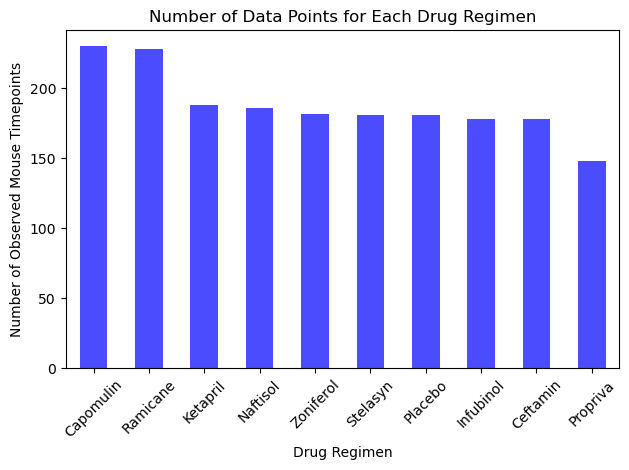

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Get the counts for each 'Drug Regimen'
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Plot the bar chart using pandas
drug_counts.plot(kind='bar', color='blue', alpha=0.7)

# Adding title and labels
plt.title('Number of Data Points for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


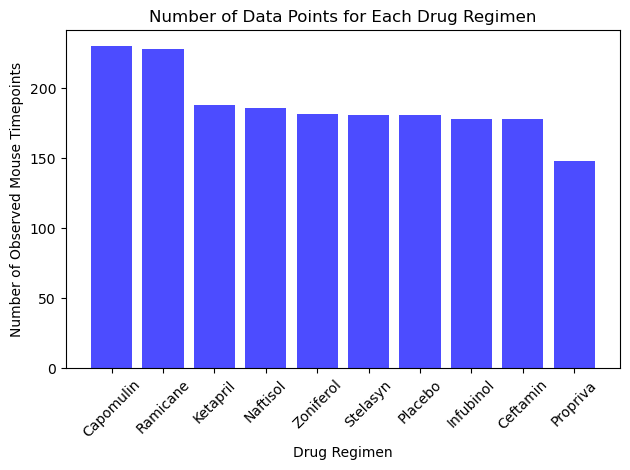

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Get the counts for each 'Drug Regimen'
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Get the drug names (x-values) and their respective counts (y-values)
drugs = drug_counts.index.tolist()
counts = drug_counts.values.tolist()

# Plot the bar chart using pyplot
plt.bar(drugs, counts, color='blue', alpha=0.7)

# Adding title and labels
plt.title('Number of Data Points for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


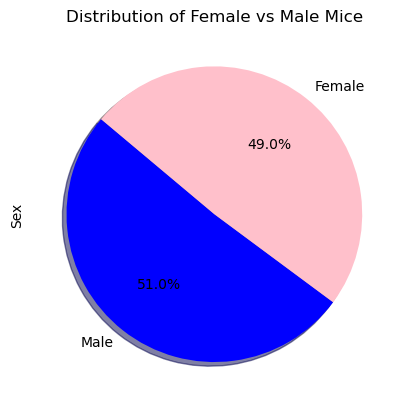

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get the counts for each gender
gender_counts = cleaned_data['Sex'].value_counts()

# Plot the pie chart using Pandas
gender_counts.plot(kind='pie', 
                   autopct='%1.1f%%', 
                   colors=['blue', 'pink'], 
                   startangle=140, 
                   shadow=True, 
                   title='Distribution of Female vs Male Mice')

plt.show()

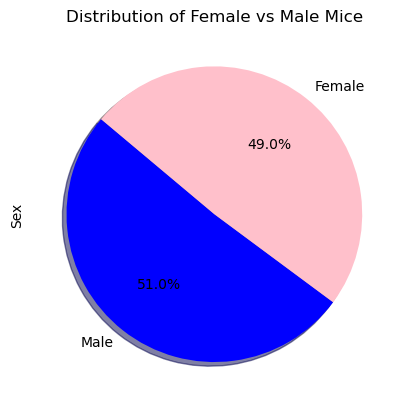

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the counts for each gender
gender_counts = cleaned_data['Sex'].value_counts()

# Labels for the sections of our pie chart
labels = gender_counts.index

# Values for each section
sizes = gender_counts.values

# Colors for each section
colors = ['blue', 'pink']

# Plot the pie chart using pyplot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')

# Display the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(four_drugs)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID').max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

print(merged_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']])

   Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
0      a203         45           67.973419    Infubinol
1      a251         45           65.525743    Infubinol
2      a275         45           62.999356     Ceftamin
3      a411         45           38.407618     Ramicane
4      a444         45           43.047543     Ramicane
..      ...        ...                 ...          ...
95     y769         45           68.594745     Ceftamin
96     y793         45           31.896238    Capomulin
97     y865         45           64.729837     Ceftamin
98     z578         45           30.638696     Ramicane
99     z581         45           62.754451    Infubinol

[100 rows x 4 columns]


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Append the tumor volumes to the list
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate the IQR for each drug
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

print(f"{drug}'s potential outliers: {outliers}")

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


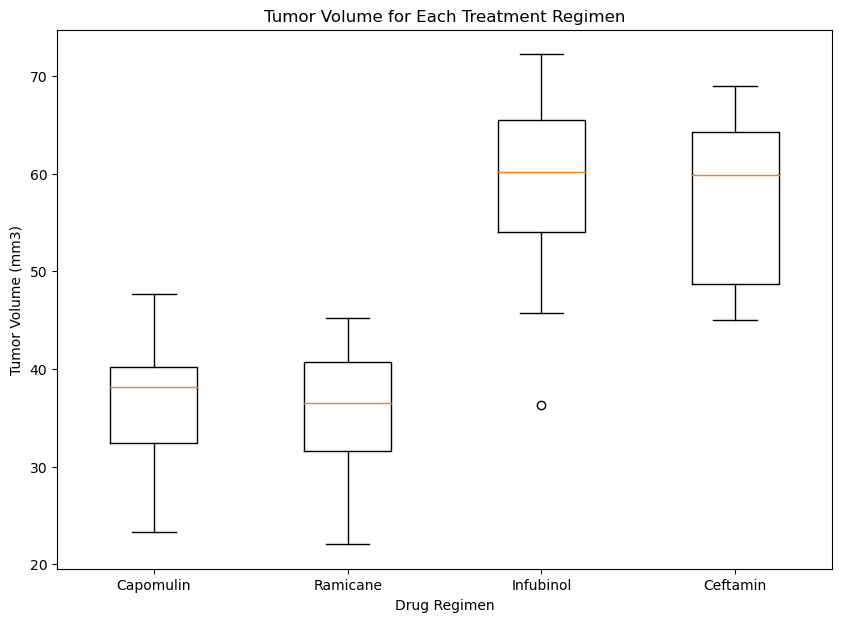

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10,7))

# Plot the data
ax.boxplot(tumor_vol_data)

# Set the title and labels
ax.set_title('Tumor Volume for Each Treatment Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(treatments)

# Display the box plot
plt.show()

## Line and Scatter Plots

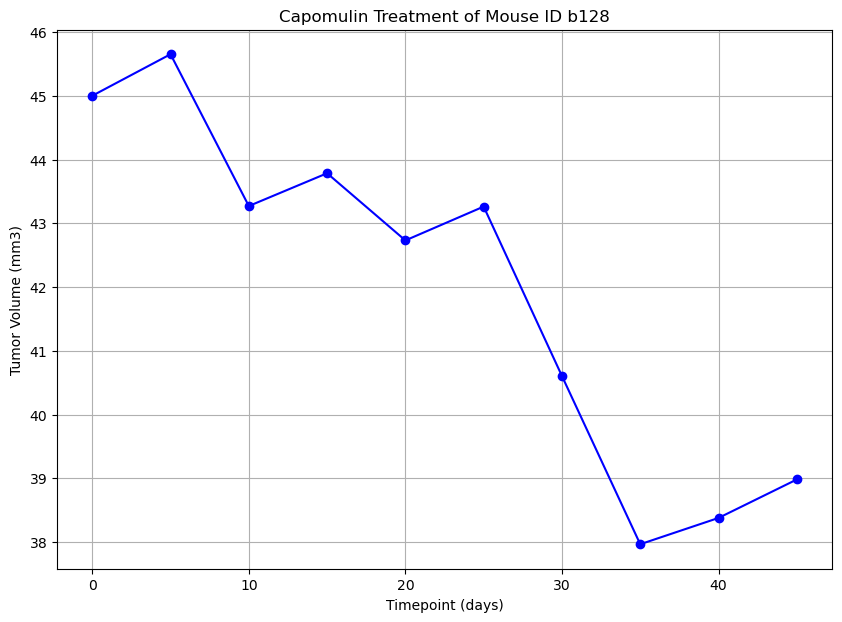

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'b128'  
mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Extract timepoints and tumor volumes
timepoints = mouse_data['Timepoint']
tumor_volumes = mouse_data['Tumor Volume (mm3)']

# Plotting the data
plt.figure(figsize=(10,7))
plt.plot(timepoints, tumor_volumes, marker='o', linestyle='-', color='b')
plt.title(f'Capomulin Treatment of Mouse ID {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


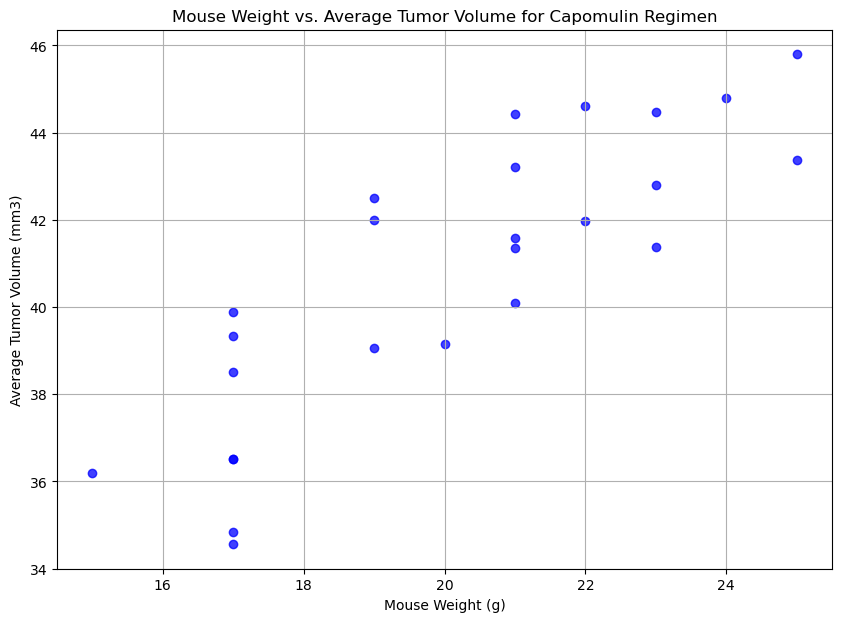

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average weight and tumor volume
grouped_capomulin = capomulin_data.groupby('Mouse ID').agg({'Weight (g)':'mean', 'Tumor Volume (mm3)':'mean'})

# Extract mouse weights and average tumor volumes
mouse_weights = grouped_capomulin['Weight (g)']
avg_tumor_volumes = grouped_capomulin['Tumor Volume (mm3)']

# Generate scatter plot
plt.figure(figsize=(10,7))
plt.scatter(mouse_weights, avg_tumor_volumes, color='blue', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


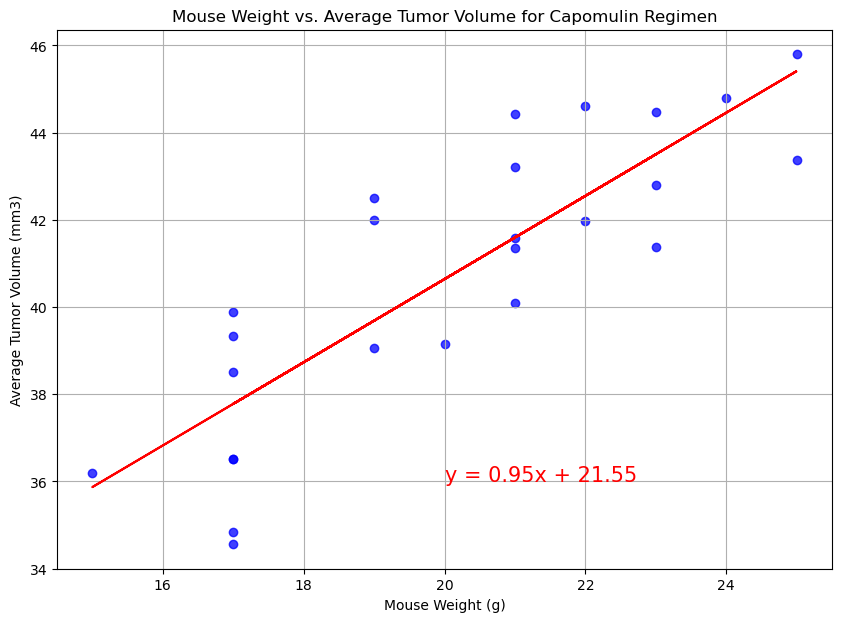

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average weight and tumor volume
grouped_capomulin = capomulin_data.groupby('Mouse ID').agg({'Weight (g)':'mean', 'Tumor Volume (mm3)':'mean'})

# Extract mouse weights and average tumor volumes
mouse_weights = grouped_capomulin['Weight (g)']
avg_tumor_volumes = grouped_capomulin['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(mouse_weights, avg_tumor_volumes)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {correlation_coefficient:.2f}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, avg_tumor_volumes)
regression_values = mouse_weights * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot scatter plot with linear regression
plt.figure(figsize=(10,7))
plt.scatter(mouse_weights, avg_tumor_volumes, color='blue', alpha=0.75)
plt.plot(mouse_weights, regression_values, color='red')
plt.annotate(line_eq, (20,36), fontsize=15, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()